<a href="https://colab.research.google.com/github/parisairam/learning/blob/master/Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of Wine Quality**

In [1]:
#I have already downloaded the wine dataset from UCI portal and the files are been uploaded to Google Colab Server
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv
Saving winequality-red.csv to winequality-red.csv


In [13]:
#Read the csv files and create dataframes
import pandas as pd
import io

white_df = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']),sep=";")
red_df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']),sep=";")

In [7]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
#Creating a column called "Alcohol Type" which will state if it is a White  wine or Red wine
# 0 - White wine
# 1 - Red wine
white_df.insert(11,column='alcohol_type',value=0)
red_df.insert(11,column='alcohol_type',value=1)

In [15]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,alcohol_type,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,6


In [18]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,alcohol_type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5


In [22]:
# Lets convert the target variable "quality" into a categorical variable, so that classification can be applied
white_df['quality'] = white_df['quality'].apply(lambda x: 1 if x > 6.5 else 0)
red_df['quality'] = red_df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

In [21]:
white_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,alcohol_type,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,1
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,0,0


In [23]:
red_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,alcohol_type,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1,0


In [25]:
# Lets merge both the dataframes in to a single wine dataframe
dataframes = ['white_df' , 'red_df']
wine_df = white_df.append(red_df)

In [29]:
# Make sure that wine dataframe has all the rows and columns from both the wine dataframes
print('White_wine : Number of rows - ',white_df.shape[0],' Number of columns - ',white_df.shape[1])
print('Red_wine : Number of rows - ',red_df.shape[0],' Number of columns - ',red_df.shape[1])
print('wine Combined : Number of rows - ',wine_df.shape[0],' Number of columns - ',wine_df.shape[1])

White_wine : Number of rows -  4898  Number of columns -  13
Red_wine : Number of rows -  1599  Number of columns -  13
wine Combined : Number of rows -  6497  Number of columns -  13


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [43]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,alcohol_type,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.246114,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000


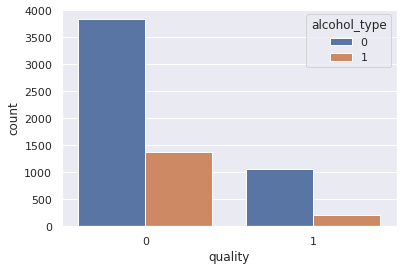

In [37]:
# From the count plot, we can notice that the the data has more bad quality wine than the good quality wine
sns.countplot(x='quality', hue='alcohol_type', data=wine_df)

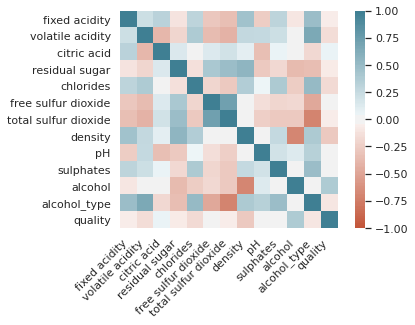

In [42]:
corr = wine_df.corr()
corr_plot = sns.heatmap(corr,vmin=-1, vmax=1, center=0,     cmap=sns.diverging_palette(20, 220, n=200),     square=True)
corr_plot = corr_plot.set_xticklabels(    corr_plot.get_xticklabels(),     rotation=45,    horizontalalignment='right');

In [44]:
#Lets create X and Y dataframes which will be used for split 
X = wine_df.drop('quality', axis= 1)
Y = wine_df['quality']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20,random_state=0, stratify = Y)

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model = SVC()

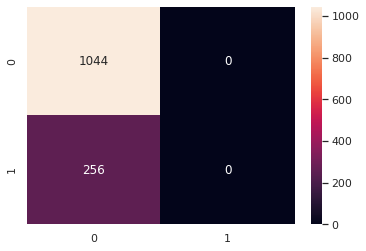

In [63]:
svc_model.fit(X_train,y_train)
test_prediction = svc_model.predict(X_test)
cm = confusion_matrix(y_test,test_prediction)
sns.heatmap(cm, annot=True,fmt='d')

# As you can see, it classified all the values as 0, which is not true. Lets do some data processing to get a better result

In [64]:
#The main reason for the data not getting classified is the data is not normalized. We will normalize the data and try building model again

min_train = X_train.min()
range_train = (X_train-min_train).max()
X_train_scaled = (X_train - min_train)/range_train

min_test = X_test.min()
range_test = (X_test-min_test).max()
X_test_scaled = (X_test - min_test)/range_test

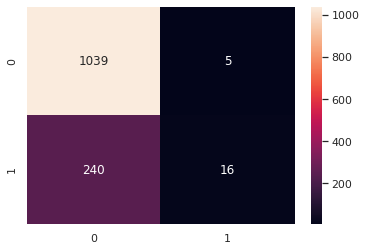

In [65]:
svc_model.fit(X_train_scaled,y_train)
test_scaled_prediction = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, test_scaled_prediction)
sns.heatmap(cm, annot=True,fmt='d')

In [67]:
from sklearn.metrics import classification_report
target_names = ['Bad Wine', 'Good Wine']
print(classification_report(y_test, test_scaled_prediction, target_names=target_names))

              precision    recall  f1-score   support

    Bad Wine       0.81      1.00      0.89      1044
   Good Wine       0.76      0.06      0.12       256

    accuracy                           0.81      1300
   macro avg       0.79      0.53      0.51      1300
weighted avg       0.80      0.81      0.74      1300



In [83]:
param_grid = {'C': [0.1, 1, 10, 30, 100], 'gamma': [1, 0.3, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

from sklearn.model_selection import GridSearchCV

In [84]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose= 4)

In [85]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.804, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.803, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.804, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.804, total=   0.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.804, total=   0.4s
[CV] C=0.1, gamma=0.3, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.3, kernel=rbf, score=0.804, total=   0.5s
[CV] C=0.1, gamma=0.3, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.3, kernel=rbf, score=0.803, total=   0.5s
[CV] C=0.1, gamma=0.3, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.3, kernel=rbf, score=0.804, total=   0.5s
[CV] C=0.1, gamma=0.3, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.3, kernel=rbf, score=0.804, total=   0.5s
[CV] C=0.1, gamma=0.3, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.3, kernel=rbf, score=0.804, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 30, 100],
                         'gamma': [1, 0.3, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [86]:
grid.best_params_

{'C': 30, 'gamma': 1, 'kernel': 'rbf'}

In [87]:
grid_prediction = grid.predict(X_test_scaled)

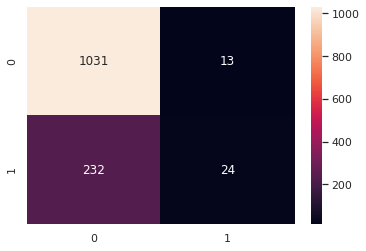

In [88]:
cm = confusion_matrix(y_test,grid_prediction)
sns.heatmap(cm,annot=True,fmt='d')

In [89]:
print(classification_report(y_test, grid_prediction, target_names=target_names))

              precision    recall  f1-score   support

    Bad Wine       0.82      0.99      0.89      1044
   Good Wine       0.65      0.09      0.16       256

    accuracy                           0.81      1300
   macro avg       0.73      0.54      0.53      1300
weighted avg       0.78      0.81      0.75      1300

